In [ ]:
# Laurent LEQUIEVRE
# Research Engineer, CNRS (France)
# Institut Pascal UMR6602
# laurent.lequievre@uca.fr

# Pendulum OpenAI gym environment is created for continuous control tasks.

Pendulum-v0
https://github.com/openai/gym/wiki/Pendulum-v0
    
The problem  is to  keep a frictionless pendulum standing up.

Action :
Box(1) -> Joint Effort between -2.0 and 2.0

Starting state :
Random angle from −π to π, and random velocity between -1 and 1

Reward :
Reward = -(theta^2 + 0.1\*theta_dt^2 + 0.001\*action^2)

Reward is based on the angle of the pendulum (1), the angular velocity (2) of the pendulum, 
and the force applied (3).
Agents get increased reward for keeping the pendulum (1) upright, (2) still, and (3) using little force.

Theta is normalized between -pi and pi

Therefore, the lowest reward is -(pi^2 + 0.1\*8^2 + 0.001\*2^2) = -16.2736044, 
and the highest reward is 0. 
In essence, the goal is to remain at zero angle (vertical), 
with the least rotational velocity, and the least effort.


Episode Termination :
There is no specified termination.

In [1]:
import gym
import numpy as np

In [10]:
env = gym.make('Pendulum-v0')
env.reset()

array([ 0.02603071, -0.99966114,  0.14493233])

In [11]:
print("action space = {}".format(env.action_space))
# Box(-2.0, 2.0, (1,), float32)
# 1 float value between -2.0 and 2.0
# Action = between -2.0 and 2.0

print("observation space = {}".format(env.observation_space))
# Box(-8.0, 8.0, (3,), float32)
# 3 float values between -8.0 and 8.0
# Observation/State = [cos(theta), sin(theta), theta dot]
# index 0 -> cos(theta) [-1.0, 1.0] 
# index 1 -> sin(theta) [-1.0, 1.0]
# index 2 -> theta dot [-8.0, 8.0]
# The angles(thetas) are passed through the sin() and cos() function so that the observations are in the range [-1,1]. 
# This fixed range of [-1,1] helps in stabilising the training in the neural networks

observation = env.reset()
print("observation = {}".format(observation))
print("internal state = {}".format(env.state)) # env state is a numpy array [theta, theta_dot]
print("theta={}, cos(theta)={}, sin(theta)={}, theta dot={}".format(env.state[0],np.cos(env.state[0]), np.sin(env.state[0]), env.state[1]))

action space = Box(-2.0, 2.0, (1,), float32)
observation space = Box(-8.0, 8.0, (3,), float32)
observation = [-0.97323528 -0.22981098 -0.91775318]
internal state = [-2.9097092  -0.91775318]
theta=-2.9097091957090253, cos(theta)=-0.9732352821977132, sin(theta)=-0.22981097773069434, theta dot=-0.9177531794044946


In [23]:
from tqdm import tqdm

for i in range(3):
    # Randomly sample an element of this space => Joint Effort between -2.0 and 2.0
    an_action = env.action_space.sample()
    print("------------------------------------------------")
    print("a sample of action = {}".format(an_action))
    
    # launch this action to the environnement
    observation = env.step(env.action_space.sample())
    # observation = (state = [cos(theta), sin(theta), theta dot] , reward, done, info)
    
    print("[{}] observation = {}".format(i,observation))
    print("[{}] reward = {}".format(i,observation[1]))
    print("[{}] internal state = {}".format(i,env.state)) # env state is a numpy array [theta, theta_dot]
    print("[{}] theta={}, cos(theta)={}, sin(theta)={}, theta dot={}".format(i,env.state[0],np.cos(env.state[0]), np.sin(env.state[0]), env.state[1]))
    
    #env.render()

#env.close()

------------------------------------------------
a sample of action = [-1.0639498]
[0] observation = (array([-0.99326451, -0.11586893,  0.56330775]), -9.361322651388539, False, {})
[0] reward = -9.361322651388539
[0] internal state = [-3.02546288  0.56330775]
[0] theta=-3.0254628764432385, cos(theta)=-0.9932645121729079, sin(theta)=-0.11586892964861335, theta dot=0.5633077549624914
------------------------------------------------
a sample of action = [0.7401112]
[1] observation = (array([-0.9898852 , -0.14187071,  0.52442409]), -9.18525965634952, False, {})
[1] reward = -9.18525965634952
[1] internal state = [-2.99924167  0.52442409]
[1] theta=-2.9992416721648345, cos(theta)=-0.9898851967274155, sin(theta)=-0.1418707062783789, theta dot=0.5244240855680763
------------------------------------------------
a sample of action = [0.2110196]
[2] observation = (array([-0.98758351, -0.1570949 ,  0.30794708]), -9.023491171561112, False, {})
[2] reward = -9.023491171561112
[2] internal state = [

<h1>Why DDPG (Deep Deterministic Policy Gradient) ?</h1>
<br>

Deep Q-Learning can deal well with high-dimensional state space (images as an input) 
but still it cannot deal with high dimensional action spaces (continuous action).

DDPG is for dealing with continuous, hence high-dimensional, action spaces.

- DDPG used an actor-critic architecture than combine Q-network and policy network.
- DDPG is an off-policy algorithm.
- DDPG can only be used for environments with continuous action spaces.
- DDPG can be thought of as being deep Q-learning for continuous action spaces.

<h3>The policy structure is known as the actor</h3>, because it is used to select actions. 
<h3>The estimated value function is known as the critic</h3>, because it criticizes 
the actions made by the actor.

The policy is basically the agent behavior, a mapping from state to action 
(in case of deterministic policy) or a distribution of actions (in case of stochastic policy).
The output of the policy network is a value that corresponds to the action to be taken on the environment.

The critic is a state-value function. After each action selection, the critic evaluates the new state to determine whether things have gone better or worse than expected


Actor takes state as input to give action as output, while critic takes both state and action as input to give as output the value of the Q function. 
<br>
The critic uses gradient temporal-difference learning while the actor parameters are learned following policy gradient theorem. 
<br>
The main idea behind this architecture is that the policy network acts producing an action and the Q-network criticize that action.
<br>
https://spinningup.openai.com/en/latest/algorithms/ddpg.html
https://github.com/openai/spinningup.git

In [ ]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb

# When we deal with high-dimensional state space or action spaces 
# we have to introduce complex and non-linear function approximators 
# such as deep neural networks

# On-policy or off-policy ?

What actually policy (denoted by π) means ?
Policy specifies an action a, that is taken in a state s (or more precisely, π is a probability, that an action a is taken in a state s).

What types of learning do we have?
1. Evaluate Q(s,a) function: predict sum of future discounted rewards, where a is an action and s is a state.
2. Find π (actually, π(a|s)), that yields to a maximum reward.

On-policy and off-policy learning is only related to the first task: evaluating Q(s,a).

The difference is this:<br>
- In on-policy learning, the Q(s,a) function is learned from actions that we took using our current policy π(a|s).
<br>The update function for the on-policy SARSA algorithm: Q(s,a)←Q(s,a)+α(r+γQ(s′,a′)−Q(s,a)), 
where a′ is the action, that was taken according to policy π.
<br>
- In off-policy learning, the Q(s,a) function is learned from taking different actions (for example, random actions). 
We even don't need a policy at all !
<br>The update function for the off-policy Q-learning algorithm: Q(s,a)←Q(s,a)+α(r+γmaxa′Q(s′,a′)−Q(s,a)), 
where a′ are all actions, that were probed in state s′.

In [24]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
import gym
import torch
from torch import nn #needed for building neural networks
import torch.nn.functional as F #needed for activation functions
import torch.optim as opt #needed for optimisation
from tqdm import tqdm_notebook as tqdm
import random
from copy import copy, deepcopy
from collections import deque
import numpy as np
print("Using torch version: {}".format(torch.__version__))

Using torch version: 1.5.1


In [25]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
BUFFER_SIZE=1000000
BATCH_SIZE=64
GAMMA=0.99
TAU=0.001       #Target Network HyperParameters Update rate
LRA=0.0001      #LEARNING RATE ACTOR
LRC=0.001       #LEARNING RATE CRITIC
H1=400   #neurons of 1st layers
H2=300   #neurons of 2nd layers

MAX_EPISODES=5000 #number of episodes of the training
MAX_STEPS=200    #max steps to finish an episode. An episode breaks early if some break conditions are met (like too much
                  #amplitude of the joints angles or if a failure occurs). In the case of pendulum there is no break 
                #condition, hence no environment reset,  so we just put 1 step per episode. 
buffer_start = 100 #initial warmup without training
epsilon = 1
epsilon_decay = 1./100000 #this is ok for a simple task like inverted pendulum, but maybe this would be set to zero for more
                     #complex tasks like Hopper; epsilon is a decay for the exploration and noise applied to the action is 
                     #weighted by this decay. In more complex tasks we need the exploration to not vanish so we set the decay
                     #to zero.
PRINT_EVERY = 10 #Print info about average reward every PRINT_EVERY

ENV_NAME = "Pendulum-v0" # Put here the gym env name you want to play with
#check other environments to play with at https://gym.openai.com/envs/#mujoco


In [26]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
class replayBuffer(object):
    def __init__(self, buffer_size, name_buffer=''):
        self.buffer_size=buffer_size  #choose buffer size
        self.num_exp=0
        self.buffer=deque()

    def add(self, s, a, r, t, s2):
        experience=(s, a, r, t, s2)
        if self.num_exp < self.buffer_size:
            self.buffer.append(experience)
            self.num_exp +=1
        else:
            self.buffer.popleft()
            self.buffer.append(experience)

    def size(self):
        return self.buffer_size

    def count(self):
        return self.num_exp

    def sample(self, batch_size):
        if self.num_exp < batch_size:
            batch=random.sample(self.buffer, self.num_exp)
        else:
            batch=random.sample(self.buffer, batch_size)

        s, a, r, t, s2 = map(np.stack, zip(*batch))

        return s, a, r, t, s2

    def clear(self):
        self.buffer = deque()
        self.num_exp=0

In [27]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
#set GPU for faster training
cuda = torch.cuda.is_available() #check for CUDA
device   = torch.device("cuda" if cuda else "cpu")
#device = "cpu"
print("Job will run on {}".format(device))


Job will run on cpu


In [28]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
def fanin_(size):
    fan_in = size[0]
    weight = 1./np.sqrt(fan_in)
    return torch.Tensor(size).uniform_(-weight, weight)

class Critic(nn.Module):
    def __init__(self, state_dim, action_dim, h1=H1, h2=H2, init_w=3e-3):
        super(Critic, self).__init__()
                
        self.linear1 = nn.Linear(state_dim, h1)
        self.linear1.weight.data = fanin_(self.linear1.weight.data.size())
        
        #self.bn1 = nn.BatchNorm1d(h1)
        
        self.linear2 = nn.Linear(h1+action_dim, h2)
        self.linear2.weight.data = fanin_(self.linear2.weight.data.size())
                
        self.linear3 = nn.Linear(h2, 1)
        self.linear3.weight.data.uniform_(-init_w, init_w)

        self.relu = nn.ReLU()
        
    def forward(self, state, action):
        x = self.linear1(state)
        x = self.relu(x)
        x = self.linear2(torch.cat([x,action],1))
        
        x = self.relu(x)
        x = self.linear3(x)
        
        return x
    

class Actor(nn.Module): 
    def __init__(self, state_dim, action_dim, h1=H1, h2=H2, init_w=0.003):
        super(Actor, self).__init__()
        
        #self.bn0 = nn.BatchNorm1d(state_dim)
        
        self.linear1 = nn.Linear(state_dim, h1)
        self.linear1.weight.data = fanin_(self.linear1.weight.data.size())
        
        #self.bn1 = nn.BatchNorm1d(h1)
        
        self.linear2 = nn.Linear(h1, h2)
        self.linear2.weight.data = fanin_(self.linear2.weight.data.size())
        
        #self.bn2 = nn.BatchNorm1d(h2)
        
        self.linear3 = nn.Linear(h2, action_dim)
        self.linear3.weight.data.uniform_(-init_w, init_w)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        
    def forward(self, state):
        #state = self.bn0(state)
        x = self.linear1(state)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.tanh(x)
        return x
    
    def get_action(self, state):
        state  = torch.FloatTensor(state).unsqueeze(0).to(device)
        action = self.forward(state)
        return action.detach().cpu().numpy()[0]

In [29]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu=0, sigma=0.2, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

    def __repr__(self):
        return 'OrnsteinUhlenbeckActionNoise(mu={}, sigma={})'.format(self.mu, self.sigma)

In [30]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
class NormalizedEnv(gym.ActionWrapper):
    """ Wrap action """

    def action(self, action):
        act_k = (self.action_space.high - self.action_space.low)/ 2.
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k * action + act_b

    def reverse_action(self, action):
        act_k_inv = 2./(self.action_space.high - self.action_space.low)
        act_b = (self.action_space.high + self.action_space.low)/ 2.
        return act_k_inv * (action - act_b)

In [31]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
env = NormalizedEnv(gym.make(ENV_NAME))
#env = gym.make(ENV_NAME)

state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

print("State dim: {}, Action dim: {}".format(state_dim, action_dim))

noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(action_dim))

critic  = Critic(state_dim, action_dim).to(device)
actor = Actor(state_dim, action_dim).to(device)

target_critic  = Critic(state_dim, action_dim).to(device)
target_actor = Actor(state_dim, action_dim).to(device)

for target_param, param in zip(target_critic.parameters(), critic.parameters()):
    target_param.data.copy_(param.data)

for target_param, param in zip(target_actor.parameters(), actor.parameters()):
    target_param.data.copy_(param.data)
    
q_optimizer  = opt.Adam(critic.parameters(),  lr=LRC)#, weight_decay=0.01)
policy_optimizer = opt.Adam(actor.parameters(), lr=LRA)

MSE = nn.MSELoss()

memory = replayBuffer(BUFFER_SIZE)

State dim: 3, Action dim: 1


In [32]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
from matplotlib import pyplot as plt
from IPython.display import clear_output
%matplotlib inline

def subplot(R, P, Q, S):
    r = list(zip(*R))
    p = list(zip(*P))
    q = list(zip(*Q))
    s = list(zip(*S))
    clear_output(wait=True)
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

    ax[0, 0].plot(list(r[1]), list(r[0]), 'r') #row=0, col=0
    ax[1, 0].plot(list(p[1]), list(p[0]), 'b') #row=1, col=0
    ax[0, 1].plot(list(q[1]), list(q[0]), 'g') #row=0, col=1
    ax[1, 1].plot(list(s[1]), list(s[0]), 'k') #row=1, col=1
    ax[0, 0].title.set_text('Reward')
    ax[1, 0].title.set_text('Policy loss')
    ax[0, 1].title.set_text('Q loss')
    ax[1, 1].title.set_text('Max steps')
    plt.show()

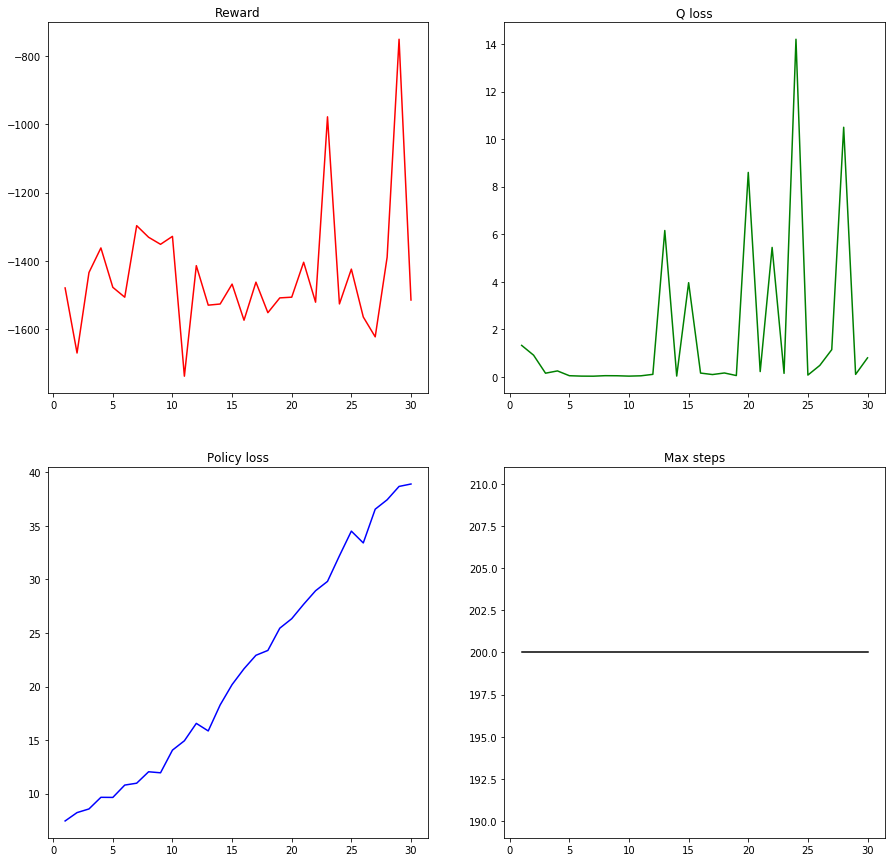

[    30 episode,     6000 total steps] average reward for past 10 iterations: -1369.381
Last model saved with reward: -751.17, at episode 29.


KeyboardInterrupt: 

In [33]:
# https://blog.paperspace.com/physics-control-tasks-with-deep-reinforcement-learning/
# https://github.com/antocapp/paperspace-ddpg-tutorial/blob/master/ddpg-pendulum-250.ipynb
plot_reward = []
plot_policy = []
plot_q = []
plot_steps = []


best_reward = -np.inf
saved_reward = -np.inf
saved_ep = 0
average_reward = 0
global_step = 0
#s = deepcopy(env.reset())

for episode in range(MAX_EPISODES):
    #print(episode)
    s = deepcopy(env.reset())
    #noise.reset()

    ep_reward = 0.
    ep_q_value = 0.
    step=0

    for step in range(MAX_STEPS):
        #loss=0
        global_step +=1
        epsilon -= epsilon_decay
        #actor.eval()
        a = actor.get_action(s)
        #actor.train()

        a += noise()*max(0, epsilon)
        a = np.clip(a, -1., 1.)
        s2, reward, terminal, info = env.step(a)


        memory.add(s, a, reward, terminal,s2)

        #keep adding experiences to the memory until there are at least minibatch size samples
        
        if memory.count() > buffer_start:
            s_batch, a_batch, r_batch, t_batch, s2_batch = memory.sample(BATCH_SIZE)

            s_batch = torch.FloatTensor(s_batch).to(device)
            a_batch = torch.FloatTensor(a_batch).to(device)
            r_batch = torch.FloatTensor(r_batch).unsqueeze(1).to(device)
            t_batch = torch.FloatTensor(np.float32(t_batch)).unsqueeze(1).to(device)
            s2_batch = torch.FloatTensor(s2_batch).to(device)
            
            
            #compute loss for critic
            a2_batch = target_actor(s2_batch)
            target_q = target_critic(s2_batch, a2_batch) #detach to avoid updating target
            y = r_batch + (1.0 - t_batch) * GAMMA * target_q.detach()
            q = critic(s_batch, a_batch)
            
            q_optimizer.zero_grad()
            q_loss = MSE(q, y) #detach to avoid updating target
            q_loss.backward()
            q_optimizer.step()
            
            #compute loss for actor
            policy_optimizer.zero_grad()
            policy_loss = -critic(s_batch, actor(s_batch))
            policy_loss = policy_loss.mean()
            policy_loss.backward()
            policy_optimizer.step()
            
            #soft update of the frozen target networks
            for target_param, param in zip(target_critic.parameters(), critic.parameters()):
                target_param.data.copy_(
                    target_param.data * (1.0 - TAU) + param.data * TAU
                )

            for target_param, param in zip(target_actor.parameters(), actor.parameters()):
                target_param.data.copy_(
                    target_param.data * (1.0 - TAU) + param.data * TAU
                )

        s = deepcopy(s2)
        ep_reward += reward


        #if terminal:
        #    noise.reset()
        #    break

    try:
        plot_reward.append([ep_reward, episode+1])
        plot_policy.append([policy_loss.data, episode+1])
        plot_q.append([q_loss.data, episode+1])
        plot_steps.append([step+1, episode+1])
    except:
        continue
    average_reward += ep_reward
    
    if ep_reward > best_reward:
        torch.save(actor.state_dict(), 'best_model_pendulum.pkl') #Save the actor model for future testing
        best_reward = ep_reward
        saved_reward = ep_reward
        saved_ep = episode+1

    if (episode % PRINT_EVERY) == (PRINT_EVERY-1):    # print every print_every episodes
        subplot(plot_reward, plot_policy, plot_q, plot_steps)
        print('[%6d episode, %8d total steps] average reward for past {} iterations: %.3f'.format(PRINT_EVERY) %
              (episode + 1, global_step, average_reward / PRINT_EVERY))
        print("Last model saved with reward: {:.2f}, at episode {}.".format(saved_reward, saved_ep))
        average_reward = 0 #reset average reward